1)Собрать все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

2)Выяснить, какой пользователь купил больше всего товаров. Если их несколько, то перечислить имена через запятую с пробелом и в алфавитном порядке.

3)Найти топ-10 товаров по числу проданных единиц за всё время и построить барплот. Сколько было продано единиц товара с product_id==56?

4)Визуализировать продажи по дням.

5)Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.

**Описание**

На этот раз данные имеют следующую структуру:
- записываются для каждого пользователя, совершившего покупки, каждый день
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
- внутри каждой папки есть файл data.csv, где и хранятся данные


Схематично выглядит так:

└── data

   ├── 2020-12-30

      │  ├── FirstName_LastName1

         │  │   └── data.csv

            │  ├── FirstName_LastName2

               │  │   └── data.csv

                  │  └── FirstName_LastName3

                     │      └── data.csv

                        └── 2020-12-31

                              ├── FirstName_LastName1

                                    │   └── data.csv

                                          └── FirstName_LastName5

                                                    └── data.csv



Например, 30 декабря три покупателя сделали покупки, 31 – два (папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.
Note: данные в задании покрывают другой временной период, имена тоже другие.

In [ ]:
import pandas as pd
import os

In [ ]:

# выводим пути к папкам (dirpath) и наименования файлов (filenames) и после этого
for dirpath, _, filenames in os.walk('/content/'):

  # во вложенном цикле проходимся по названиям файлов
  for filename in filenames:

    # и соединяем путь до папок и входящие в эти папки файлы
    # с помощью метода path.join()
    print(os.path.join(dirpath, filename))

/content/data.zip
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/logs/2024.01.26/14.24.48.455469.log
/content/.config/logs/2024.01.26/14.25.16.769040.log
/content/.config/logs/2024.01.26/14.25.55.011990.log
/content/.config/logs/2024.01.26/14.25.54.003315.log
/content/.config/logs/2024.01.26/14.25.40.551145.log
/content/.config/logs/2024.01.26/14.25.30.297593.log
/content/.config/configurations/config_default
/content/sample_data/README.md
/content/sample_data/anscombe.json
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_train_small.csv


In [ ]:
import zipfile

In [ ]:
with zipfile.ZipFile('/content/data.zip', 'r') as zip_ref:
    zip_ref.extractall('unpacked_files')

In [ ]:
path = '/content/unpacked_files/data'

In [ ]:
os.listdir('/content/unpacked_files/data')

['2020-12-08',
 '2020-12-06',
 '2020-12-09',
 '2020-12-07',
 '2020-12-04',
 '2020-12-05',
 '2020-12-03']

Надо из data.zip собрать все csv и получить один дата фрейм

In [ ]:
data = pd.read_csv('/content/unpacked_files/data/2020-12-06/Vasiliy_Fedorov/data.csv')
data

,Unnamed: 0,product_id,quantity
0,0,56,4
1,1,97,3
2,2,79,3
3,3,29,5


In [ ]:
os.walk(path) #Прогуляемся по папкам, позволяет извлечь пути

<generator object _walk at 0x7966b372b5a0>

In [ ]:
#Получим кортеж, который содержит несколько значений
#1 это строка которая содержит путь
#2 это список с датами
for i in os.walk(path):
  print(i)
  break

('/content/unpacked_files/data', ['2020-12-08', '2020-12-06', '2020-12-09', '2020-12-07', '2020-12-04', '2020-12-05', '2020-12-03'], [])


In [ ]:
for i in os.walk(path + '/2020-12-07/Vasiliy_Ivanov'):
  print(i)
  break

('/content/unpacked_files/data/2020-12-07/Vasiliy_Ivanov', [], ['data.csv'])


In [ ]:
for i in os.walk(path):
  curent_path = i[0]
  dirs = i[1]
  files = i[2]
  print(curent_path, files)

/content/unpacked_files/data []
/content/unpacked_files/data/2020-12-08 []
/content/unpacked_files/data/2020-12-08/Kirill_Smirnov ['data.csv']
/content/unpacked_files/data/2020-12-08/Alexey_Fedorov ['data.csv']
/content/unpacked_files/data/2020-12-08/Rostislav_Petrov ['data.csv']
/content/unpacked_files/data/2020-12-08/Petr_Petrov ['data.csv']
/content/unpacked_files/data/2020-12-08/Anton_Smirnov ['data.csv']
/content/unpacked_files/data/2020-12-06 []
/content/unpacked_files/data/2020-12-06/Vasiliy_Fedorov ['data.csv']
/content/unpacked_files/data/2020-12-09 []
/content/unpacked_files/data/2020-12-09/Vasiliy_Ivanov ['data.csv']
/content/unpacked_files/data/2020-12-09/Anton_Petrov ['data.csv']
/content/unpacked_files/data/2020-12-09/Rostislav_Petrov ['data.csv']
/content/unpacked_files/data/2020-12-09/Alexey_Smirnov ['data.csv']
/content/unpacked_files/data/2020-12-09/Anton_Smirnov ['data.csv']
/content/unpacked_files/data/2020-12-09/Petr_Fedorov ['data.csv']
/content/unpacked_files/dat

In [ ]:
path_parts = '/content/unpacked_files/data/2020-12-06/Vasiliy_Fedorov'.split('/')
path_parts

['', 'content', 'unpacked_files', 'data', '2020-12-06', 'Vasiliy_Fedorov']

In [ ]:
date = path_parts[-2]
date

'2020-12-06'

In [ ]:
name = path_parts[-1]
name

'Vasiliy_Fedorov'

In [ ]:
#Сделаем пустой дата фрейм
df = pd.DataFrame()

#Пройдем циклом по папкам и сгенерируем df
for (curent_path, dirs, files) in os.walk(path):
  for file in files:
    data_path = (curent_path + '/' + file)

    temp_df = pd.read_csv(data_path)

    path_parts = curent_path.split('/')
    date = path_parts[-2]
    name = path_parts[-1]

    temp_df['date'] = date
    temp_df['name'] = name

    #Соединяем датафреймы, тоесть каждый раз добавляем вниз новый дф
    df = pd.concat((df, temp_df), axis = 0)

In [ ]:
df = df.drop(columns = ['Unnamed: 0'])

In [ ]:
df.reset_index()

,index,product_id,quantity,date,name
0,0,35,4,2020-12-08,Kirill_Smirnov
1,0,73,5,2020-12-08,Alexey_Fedorov
2,1,34,1,2020-12-08,Alexey_Fedorov
3,2,71,1,2020-12-08,Alexey_Fedorov
4,3,18,2,2020-12-08,Alexey_Fedorov
...,...,...,...,...,...
156,4,1,4,2020-12-03,Alexey_Smirnov
157,5,94,4,2020-12-03,Alexey_Smirnov
158,0,94,4,2020-12-03,Petr_Fedorov
159,1,7,2,2020-12-03,Petr_Fedorov


In [ ]:
df.reset_index(drop = True, inplace = True)

In [ ]:
df

,product_id,quantity,date,name
0,35,4,2020-12-08,Kirill_Smirnov
1,73,5,2020-12-08,Alexey_Fedorov
2,34,1,2020-12-08,Alexey_Fedorov
3,71,1,2020-12-08,Alexey_Fedorov
4,18,2,2020-12-08,Alexey_Fedorov
...,...,...,...,...
156,1,4,2020-12-03,Alexey_Smirnov
157,94,4,2020-12-03,Alexey_Smirnov
158,94,4,2020-12-03,Petr_Fedorov
159,7,2,2020-12-03,Petr_Fedorov


**2-й способ**

In [ ]:
from pathlib import Path

In [ ]:
path = '/content/unpacked_files/data'

In [ ]:
#Сделаем пустой дата фрейм
df = pd.DataFrame()

#Пройдем циклом по папкам и сгенерируем df
for (curent_path, dirs, files) in os.walk(path):
  for file in files:
    part_path = Path(curent_path)
    data_path = part_path / file

    temp_df = pd.read_csv(data_path)

    date = data_path.parts[-3]
    name = data_path.parts[-2]

    temp_df['date'] = date
    temp_df['name'] = name

    #Соединяем датафреймы, тоесть каждый раз добавляем вниз новый дф
    df = pd.concat((df, temp_df), axis = 0)

In [ ]:
df

,Unnamed: 0,product_id,quantity,date,name
0,0,35,4,2020-12-08,Kirill_Smirnov
0,0,73,5,2020-12-08,Alexey_Fedorov
1,1,34,1,2020-12-08,Alexey_Fedorov
2,2,71,1,2020-12-08,Alexey_Fedorov
3,3,18,2,2020-12-08,Alexey_Fedorov
...,...,...,...,...,...
4,4,1,4,2020-12-03,Alexey_Smirnov
5,5,94,4,2020-12-03,Alexey_Smirnov
0,0,94,4,2020-12-03,Petr_Fedorov
1,1,7,2,2020-12-03,Petr_Fedorov


**3-й способ**

In [ ]:
miniproject_path = Path(path)
miniproject_path

PosixPath('/content/unpacked_files/data')

In [ ]:
list(miniproject_path.glob('**/*.csv'))

[PosixPath('/content/unpacked_files/data/2020-12-08/Kirill_Smirnov/data.csv'),
 PosixPath('/content/unpacked_files/data/2020-12-08/Alexey_Fedorov/data.csv'),
 PosixPath('/content/unpacked_files/data/2020-12-08/Rostislav_Petrov/data.csv'),
 PosixPath('/content/unpacked_files/data/2020-12-08/Petr_Petrov/data.csv'),
 PosixPath('/content/unpacked_files/data/2020-12-08/Anton_Smirnov/data.csv'),
 PosixPath('/content/unpacked_files/data/2020-12-06/Vasiliy_Fedorov/data.csv'),
 PosixPath('/content/unpacked_files/data/2020-12-09/Vasiliy_Ivanov/data.csv'),
 PosixPath('/content/unpacked_files/data/2020-12-09/Anton_Petrov/data.csv'),
 PosixPath('/content/unpacked_files/data/2020-12-09/Rostislav_Petrov/data.csv'),
 PosixPath('/content/unpacked_files/data/2020-12-09/Alexey_Smirnov/data.csv'),
 PosixPath('/content/unpacked_files/data/2020-12-09/Anton_Smirnov/data.csv'),
 PosixPath('/content/unpacked_files/data/2020-12-09/Petr_Fedorov/data.csv'),
 PosixPath('/content/unpacked_files/data/2020-12-09/Anto

In [ ]:
df = pd.DataFrame()

for csv_path in miniproject_path.glob('**/*.csv'):
  temp_df = pd.read_csv(csv_path)

  df = pd.concat((df, temp_df))

In [ ]:
df

,Unnamed: 0,product_id,quantity
0,0,35,4
0,0,73,5
1,1,34,1
2,2,71,1
3,3,18,2
...,...,...,...
4,4,1,4
5,5,94,4
0,0,94,4
1,1,7,2


**2)Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.**

In [ ]:
maxtov = df.groupby('name', as_index = False).agg({'quantity':'sum'}).sort_values('quantity', ascending=False )
maxtov

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


In [ ]:
names = maxtov.name.tolist()
lst = names[:2]

In [ ]:
', '.join(lst)

'Alexey_Smirnov, Petr_Smirnov'

**3)Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?**

In [ ]:
df

,Unnamed: 0,product_id,quantity,date,name
0,0,35,4,2020-12-08,Kirill_Smirnov
0,0,73,5,2020-12-08,Alexey_Fedorov
1,1,34,1,2020-12-08,Alexey_Fedorov
2,2,71,1,2020-12-08,Alexey_Fedorov
3,3,18,2,2020-12-08,Alexey_Fedorov
...,...,...,...,...,...
4,4,1,4,2020-12-03,Alexey_Smirnov
5,5,94,4,2020-12-03,Alexey_Smirnov
0,0,94,4,2020-12-03,Petr_Fedorov
1,1,7,2,2020-12-03,Petr_Fedorov


In [ ]:
top10 = df.groupby('product_id', as_index = False).agg({'quantity':'sum'}).sort_values('quantity', ascending=False ).head(10)
top10

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<Axes: xlabel='product_id'>

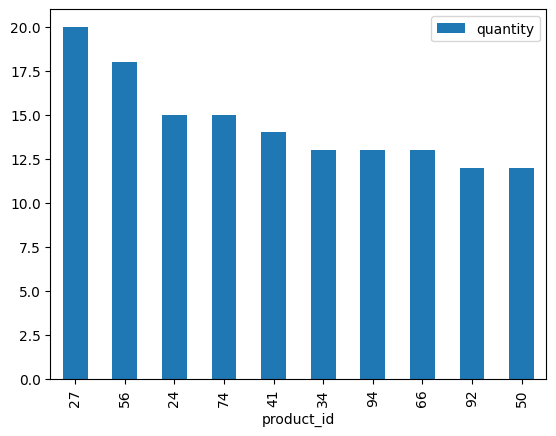

In [ ]:
top10.plot.bar(x='product_id', y='quantity')

In [ ]:
import seaborn as sns


<ipython-input-69-1f988aac0a22>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = top10, x='product_id', y='quantity', palette = 'tab10', alpha = 0.72 )


<Axes: xlabel='product_id', ylabel='quantity'>

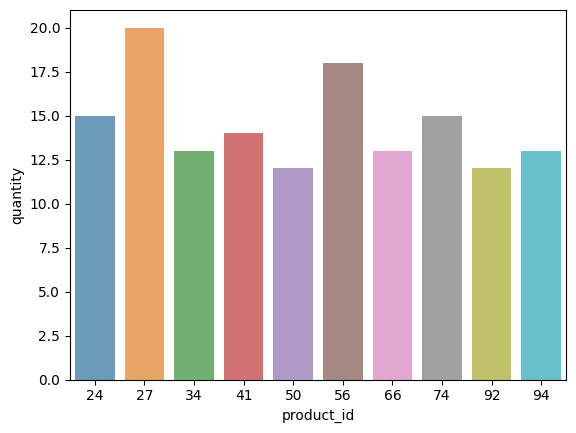

In [ ]:
sns.barplot(data = top10, x='product_id', y='quantity', palette = 'tab10', alpha = 0.72)

**4)Визуализируйте продажи по дням**

<Axes: xlabel='date'>

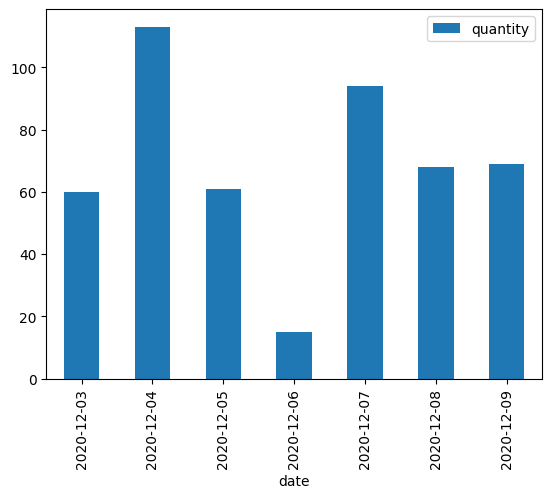

In [ ]:
dataprod = df.groupby('date', as_index = False).agg({'quantity':'sum'})
dataprod.plot(kind = 'bar', x = 'date', y = 'quantity')

**5)Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.**

In [ ]:
df

,Unnamed: 0,product_id,quantity,date,name
0,0,35,4,2020-12-08,Kirill_Smirnov
0,0,73,5,2020-12-08,Alexey_Fedorov
1,1,34,1,2020-12-08,Alexey_Fedorov
2,2,71,1,2020-12-08,Alexey_Fedorov
3,3,18,2,2020-12-08,Alexey_Fedorov
...,...,...,...,...,...
4,4,1,4,2020-12-03,Alexey_Smirnov
5,5,94,4,2020-12-03,Alexey_Smirnov
0,0,94,4,2020-12-03,Petr_Fedorov
1,1,7,2,2020-12-03,Petr_Fedorov


In [ ]:
df.groupby(['name', 'product_id']).agg({'date':pd.Series.nunique }).query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2
